In [357]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [358]:
class LinearRegressor:
    def __init__(self) -> None:
        self.theta = None

    def mse_loss(self, y: np.array, y_pred: np.array)->float:
        """Calculate MSE Loss

        Args:
            y (np.array): Actual target vector of shape(m, 1)
            y_pred (np.array): Predicted target vector of shape (m, 1)

        Returns:
            float: MSE LOSS
        """
        
        m = y.shape[0]
        loss = ((y_pred - y) ** 2).sum() / (2 * m)
        
        return loss
    
    def R2_score(self, y: np.array, y_pred: np.array) -> float:
        """Calculate R2 Score

        Args:
            y (np.array): Actual target vector of shape(m, 1)
            y_pred (np.array): Predicted target vector of shape (m, 1)

        Returns:
            float: R2 Score
        """
        R2 = 1 - (((y_pred - y)**2).sum() / (((y - y.mean())**2).sum()))
        return R2

    def calculate_gradients(self, X: np.array, y: np.array, y_pred: np.array)->np.array:
        """Calculate the gradient array

        Args:
            X (np.array): Feature matrix of shape (m, n) where m = number of rows/data samples and n = number of columns/features
            y (np.array): Actual target vector of shape (m, 1)
            y_pred (np.array): Predicted target vector of shape (m, 1)

        Returns:
            np.array: Gradient array
        """
        m = y.shape[0]
        n = X.shape[1]

        gradient = np.zeros((1, n+1))
        
        new_dimension = np.ones((X.shape[0],1))
        X_train = np.hstack((new_dimension, X))

        gradient = ((y_pred - y).T @ X_train)/m
        return gradient

    def gradient_descent(self, alpha: float, theta: np.array, gradient: np.array)->np.array:
        """Update the parameters using gradient descent

        Args:
            alpha (float): Learning rate
            theta (np.array): Parameters of model of shae (n+1, 1)
            gradeint (np.array): Gradeints of loss function of shape (1, n+1)

        Returns:
            np.array: Updated value of parameters of shape (n+1, 1)
        """
        theta = theta - alpha * gradient.T
        return theta
        
    def train(self, X_train: np.array,X_val: np.array, y_train: np.array, y_val: np.array, n_iters: int, alpha: float):
        """Train through given datas for n iterations

        Args:
            X_train (np.array): Feature matrix of shape (m, n) where m = number of rows/data samples and n = number of columns/features
            X_val (np.array): Validation set
            y (np.array): Target vector of shape (m, 1)
            n_iters (int): Number of times to iterate
            alpha (float): Learning rate

        Returns:
            theta, history: (Function parameters, history)
        """
        m = X_train.shape[0]
        n = X_train.shape[1]

        theta = np.ones((n+1, 1))

        new_dimension = np.ones((m,1))
        X_train_1 = np.hstack((new_dimension, X_train))

        new_dimension = np.ones((X_val.shape[0], 1))
        X_val_1 = np.hstack((new_dimension, X_val))

        history = {
            "loss_train": [],
            "loss_val": [],
            "r2_score" : [],
            "theta": []
        }

        for i in tqdm(range(n_iters)):
            y_pred_train = X_train_1 @ theta
            history["loss_train"].append(self.mse_loss(y_train, y_pred_train))
            history["r2_score"].append(self.R2_score(y_train, y_pred_train))
            gradient = self.calculate_gradients(X_train,y_train,y_pred_train)
            theta = self.gradient_descent(alpha, theta, gradient)
            history["theta"].append(theta)

            y_pred_val = X_val_1 @ theta
            history["loss_val"].append(self.mse_loss(y_val, y_pred_val))

        self.theta = theta
        return history
    
    def predict(self, X: np.array) -> float:
        """Predicts the value of y using X

        Args:
            X (np.array): Array of features

        Returns:
            float: Predicted values
        """

        X = X.reshape(X.shape[0], -1)
        new_dimension = np.ones((X.shape[0],1))
        X_train = np.hstack((new_dimension, X))

        return X_train @ self.theta

In [359]:
df = pd.read_csv("./train.csv")

In [360]:
df_train = df.sample(frac=0.6)
df_test = df.drop(df_train.index)
df_val = df_test.sample(frac=0.5, random_state=2)
df_test = df_test.drop(df_val.index)

df.shape, df_train.shape, df_val.shape

((159, 10), (95, 10), (32, 10))

In [361]:
columns = ["Length1", "Height", "Width"]

for column in columns:
    mean = df_train[column].mean()
    std = df_train[column].std()
    df_train[f"{column}_normalized"] = (df_train[column] - mean) / std
    df_val[f"{column}_normalized"] = (df_val[column] - mean) / std
    df_test[f"{column}_normalized"] = (df_test[column] - mean) / std
    df[f"{column}_normalized"] = (df[column] - mean) / std

df_train = df_train.drop(columns=columns)
df_val = df_val.drop(columns=columns)
df_test = df_test.drop(columns=columns)


In [362]:
df_test.head()

,Weight,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish,Length1_normalized,Height_normalized,Width_normalized
11,500.0,False,False,False,False,False,False,0.226340,1.287106,0.160811
15,600.0,False,False,False,False,False,False,0.303036,1.545345,0.646579
17,700.0,False,False,False,False,False,False,0.412601,1.424288,0.403822
19,650.0,False,False,False,False,False,False,0.478341,1.311899,0.740254
20,575.0,False,False,False,False,False,False,0.511211,1.470411,0.639915


In [363]:
X_train = df_train.drop(columns=["Weight"]).values
y_train = df_train["Weight"].values.reshape(-1 ,1)
X_val = df_val.drop(columns=["Weight"]).values
y_val = df_val["Weight"].values.reshape(-1 ,1)
X_test = df_test.drop(columns=["Weight"]).values
y_test = df_test["Weight"].values.reshape(-1 ,1)

In [364]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((95, 9), (95, 1), (32, 9), (32, 1))

In [365]:
model = LinearRegressor()
n_iters = 1000
alpha = 0.01
history = model.train(X_train, X_val, y_train, y_val, n_iters, alpha)

100%|██████████| 1000/1000 [00:00<00:00, 7270.56it/s]


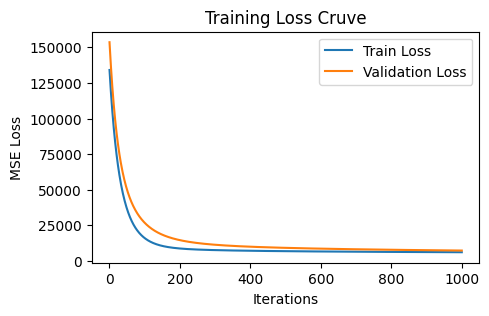

In [366]:
fig=plt.figure(figsize=(5, 3))
counts=np.linspace(1, n_iters, n_iters)
plt.plot(counts, history["loss_train"], label="Train Loss")
plt.plot(counts, history["loss_val"], label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Training Loss Cruve")
plt.legend()
plt.show()

In [367]:
y_test_pred = model.predict(X_test)

r2_score_test = model.R2_score(y_test, y_test_pred)

r2_score_test

np.float64(0.9136532473827906)

In [368]:
y_val_pred = model.predict(X_val)

r2_score_val = model.R2_score(y_val, y_val_pred)

r2_score_val

np.float64(0.9138470309459785)

In [369]:
y_train_pred = model.predict(X_train)

r2_score_trian = model.R2_score(y_train, y_train_pred)

r2_score_trian

np.float64(0.8916848857460566)

In [370]:
history["loss_train"][n_iters-1]

6032.714089098008

In [371]:
np.sqrt(history["loss_train"][n_iters-1]), np.sqrt(history["loss_val"][n_iters-1])

(np.float64(77.67054840219689), np.float64(84.92354818130482))

In [372]:
df["Weight"].mean()

np.float64(395.40188679245284)

In [373]:
rmse = np.sqrt(model.mse_loss(y_pred=y_test_pred, y=y_test))
mean = df["Weight"].mean()
relative_error = rmse/mean

In [374]:
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R2 Score: {r2_score_test:.3f}")
print(f"Relative Error: {relative_error:.2%}")

Root Mean Squared Error (RMSE): 66.24
R2 Score: 0.914
Relative Error: 16.75%
